Sanity checks:
Today: a = 1.000, z = 0.000, t = 13.80 Gyr
Matter–radiation equality: z ≈ -1
Acceleration onset (q=0): z ≈ 0.63
ΩΛ overtakes Ωm:           z ≈ 999999999.00


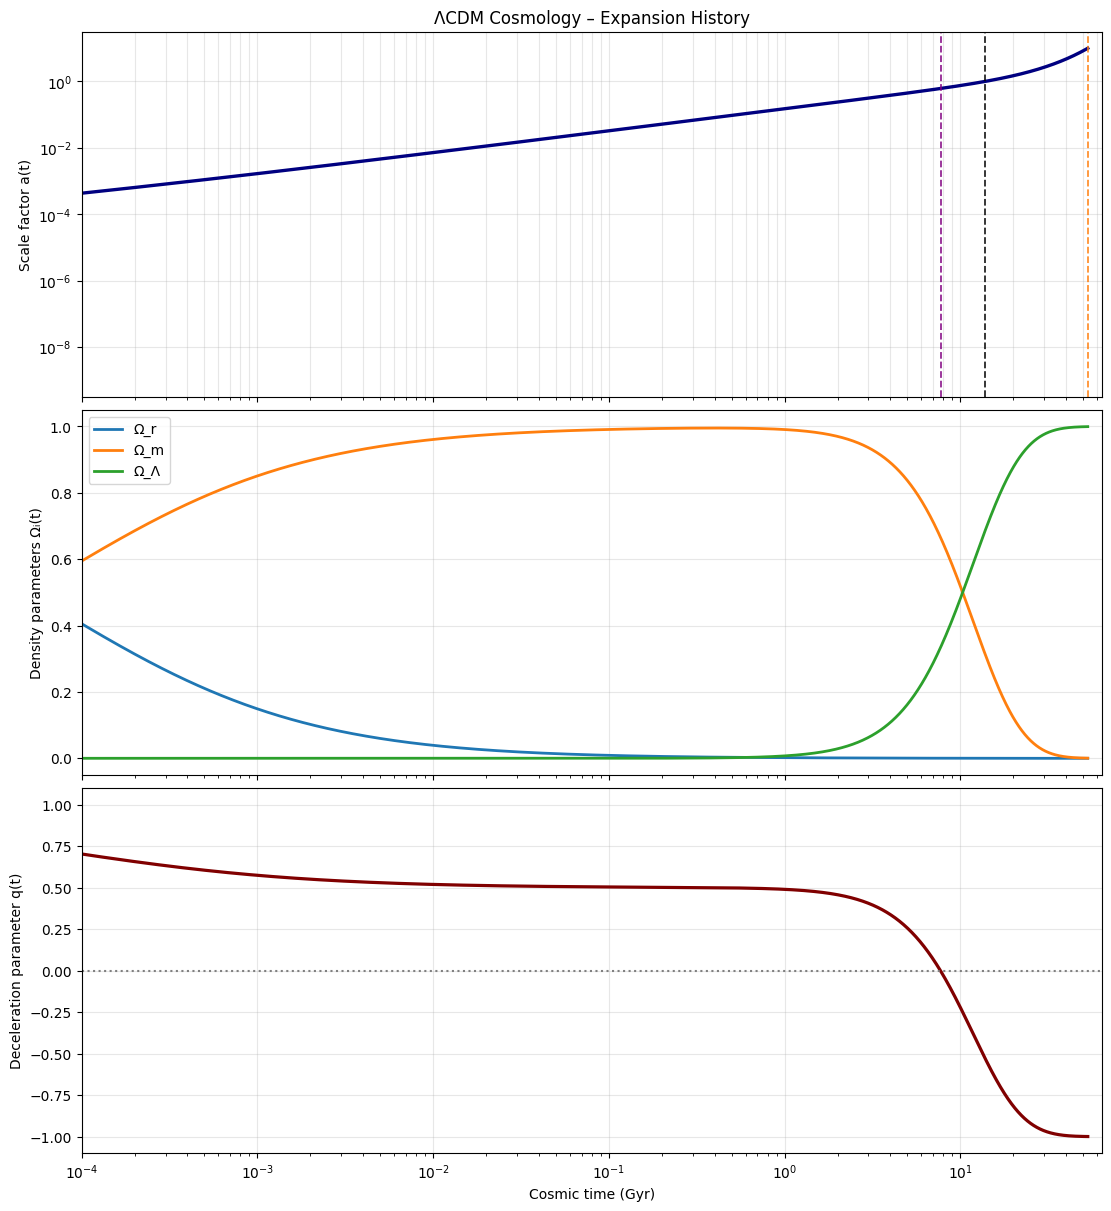

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# ============================================================
# Cosmological parameters (Planck-like, flat ΛCDM)
# ============================================================
H0_km_s_Mpc = 67.4
H0_Gyr = H0_km_s_Mpc / 977.8          # Gyr⁻¹
t_today_target = 13.8                # Gyr (observed age)

Omega_m = 0.315
Omega_r = 9.2e-5
Omega_L = 1.0 - Omega_m - Omega_r

# ============================================================
# Scale factor grid (log-spaced)
# ============================================================
a = np.logspace(-9, 1, 6000)
idx_today = np.argmin(np.abs(a - 1.0))

# ============================================================
# Hubble parameter H(a)  [CORRECT FORM]
# ============================================================
H = H0_Gyr * np.sqrt(
    Omega_r / a**4 +
    Omega_m / a**3 +
    Omega_L
)

# ============================================================
# Cosmic time: t(a) = ∫ da / (a H(a))
# ============================================================
dt_da = 1.0 / (a * H)
t = cumulative_trapezoid(dt_da, a, initial=0.0)

# Normalize so that a = 1 corresponds to 13.8 Gyr
t *= t_today_target / t[idx_today]

# ============================================================
# Density parameters Ωᵢ(a)
# ============================================================
E2 = (H / H0_Gyr)**2

Omega_r_t = (Omega_r / a**4) / E2
Omega_m_t = (Omega_m / a**3) / E2
Omega_L_t = Omega_L / E2

# ============================================================
# Deceleration parameter
# q = ½Ωm + Ωr − ΩΛ
# ============================================================
q = 0.5 * Omega_m_t + Omega_r_t - Omega_L_t

# ============================================================
# Key epochs
# ============================================================
idx_eq = np.argmin(np.abs(Omega_r_t - Omega_m_t))
idx_de = np.argmin(np.abs(Omega_m_t - Omega_L_t))
idx_accel = np.where(q < 0)[0][0]

print("Sanity checks:")
print(f"Today: a = {a[idx_today]:.3f}, z = {1/a[idx_today]-1:.3f}, t = {t[idx_today]:.2f} Gyr")
print(f"Matter–radiation equality: z ≈ {1/a[idx_eq]-1:.0f}")
print(f"Acceleration onset (q=0): z ≈ {1/a[idx_accel]-1:.2f}")
print(f"ΩΛ overtakes Ωm:           z ≈ {1/a[idx_de]-1:.2f}")

# ============================================================
# Plotting (clean, publication-style)
# ============================================================
fig, ax = plt.subplots(
    3, 1,
    figsize=(11, 12),
    sharex=True,
    constrained_layout=True
)

# --- Scale factor ---
ax[0].loglog(t, a, lw=2.4, color='navy')
ax[0].set_ylabel("Scale factor a(t)")
ax[0].set_title("ΛCDM Cosmology – Expansion History")
ax[0].grid(True, which='both', alpha=0.3)

for idx, label, color in [
    (idx_today, "Today", "black"),
    (idx_eq, "Matter–Radiation Equality", "C1"),
    (idx_accel, "Acceleration Onset (q=0)", "purple"),
    (idx_de, "ΩΛ > Ωm", "C3")
]:
    ax[0].axvline(t[idx], color=color, ls='--', lw=1.3, alpha=0.85)

# --- Density parameters ---
ax[1].semilogx(t, Omega_r_t, label="Ω_r", lw=2)
ax[1].semilogx(t, Omega_m_t, label="Ω_m", lw=2)
ax[1].semilogx(t, Omega_L_t, label="Ω_Λ", lw=2)
ax[1].set_ylabel("Density parameters Ωᵢ(t)")
ax[1].set_ylim(-0.05, 1.05)
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# --- Deceleration parameter ---
ax[2].semilogx(t, q, lw=2.3, color='maroon')
ax[2].axhline(0, color='gray', ls=':')
ax[2].set_ylabel("Deceleration parameter q(t)")
ax[2].set_xlabel("Cosmic time (Gyr)")
ax[2].grid(True, alpha=0.3)

ax[2].set_xscale('log')
ax[2].set_xlim(1e-4, t[-1]*1.2)

plt.show()
